In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.10.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               5538048   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 5,540,938
Trainable params: 5,540,938
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(train_images, train_labels, batch_size=512, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
118/118 [==============================] - 2s 13ms/step - loss: 0.5751 - accuracy: 0.8005 - val_loss: 0.3867 - val_accuracy: 0.8661
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.3230 - accuracy: 0.8858 - val_loss: 0.3314 - val_accuracy: 0.8807
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2750 - accuracy: 0.9015 - val_loss: 0.3140 - val_accuracy: 0.8888
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2361 - accuracy: 0.9148 - val_loss: 0.3000 - val_accuracy: 0.8922
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2126 - accuracy: 0.9234 - val_loss: 0.2793 - val_accuracy: 0.8982
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1925 - accuracy: 0.9311 - val_loss: 0.2704 - val_accuracy: 0.9029
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1725 - accuracy: 0.9385 - val_loss: 0.2683 - val_accuracy: 0.9014

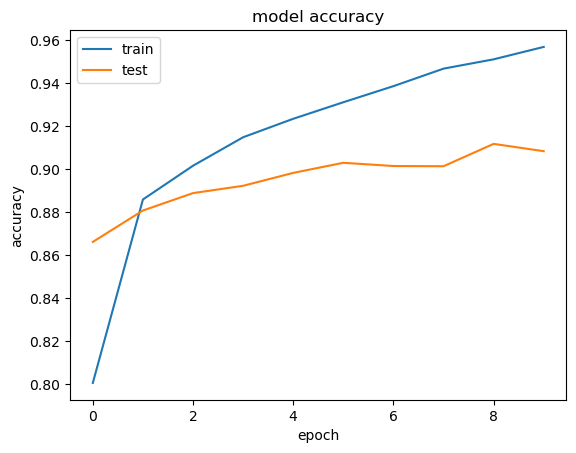

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()